##### Importing the required packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

##### Reading in the csv file 

In [2]:
salary = pd.read_csv('salary.csv')

##### Inspecting the dataframe to locate any missing values

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary         513 non-null float64
exprior        514 non-null int64
yearsworked    514 non-null int64
yearsrank      514 non-null int64
market         514 non-null float64
degree         514 non-null int64
otherqual      514 non-null int64
position       514 non-null int64
male           514 non-null int64
Field          514 non-null int64
yearsabs       514 non-null int64
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [4]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


##### There is one missing value in the salary column. We could either drop the missing value or replace it with the mean of the salary. In this case, we will replace the missing value with the mean because it is a small dataset.

In [5]:
mean = salary.salary.mean()

In [6]:
mean

50863.22009783626

In [7]:
salary = salary.fillna(mean)

In [8]:
salary.isnull().sum()

salary         0
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

##### We will now use a pairplot to see the relationships between different values as well as to see which columns have continuous values.

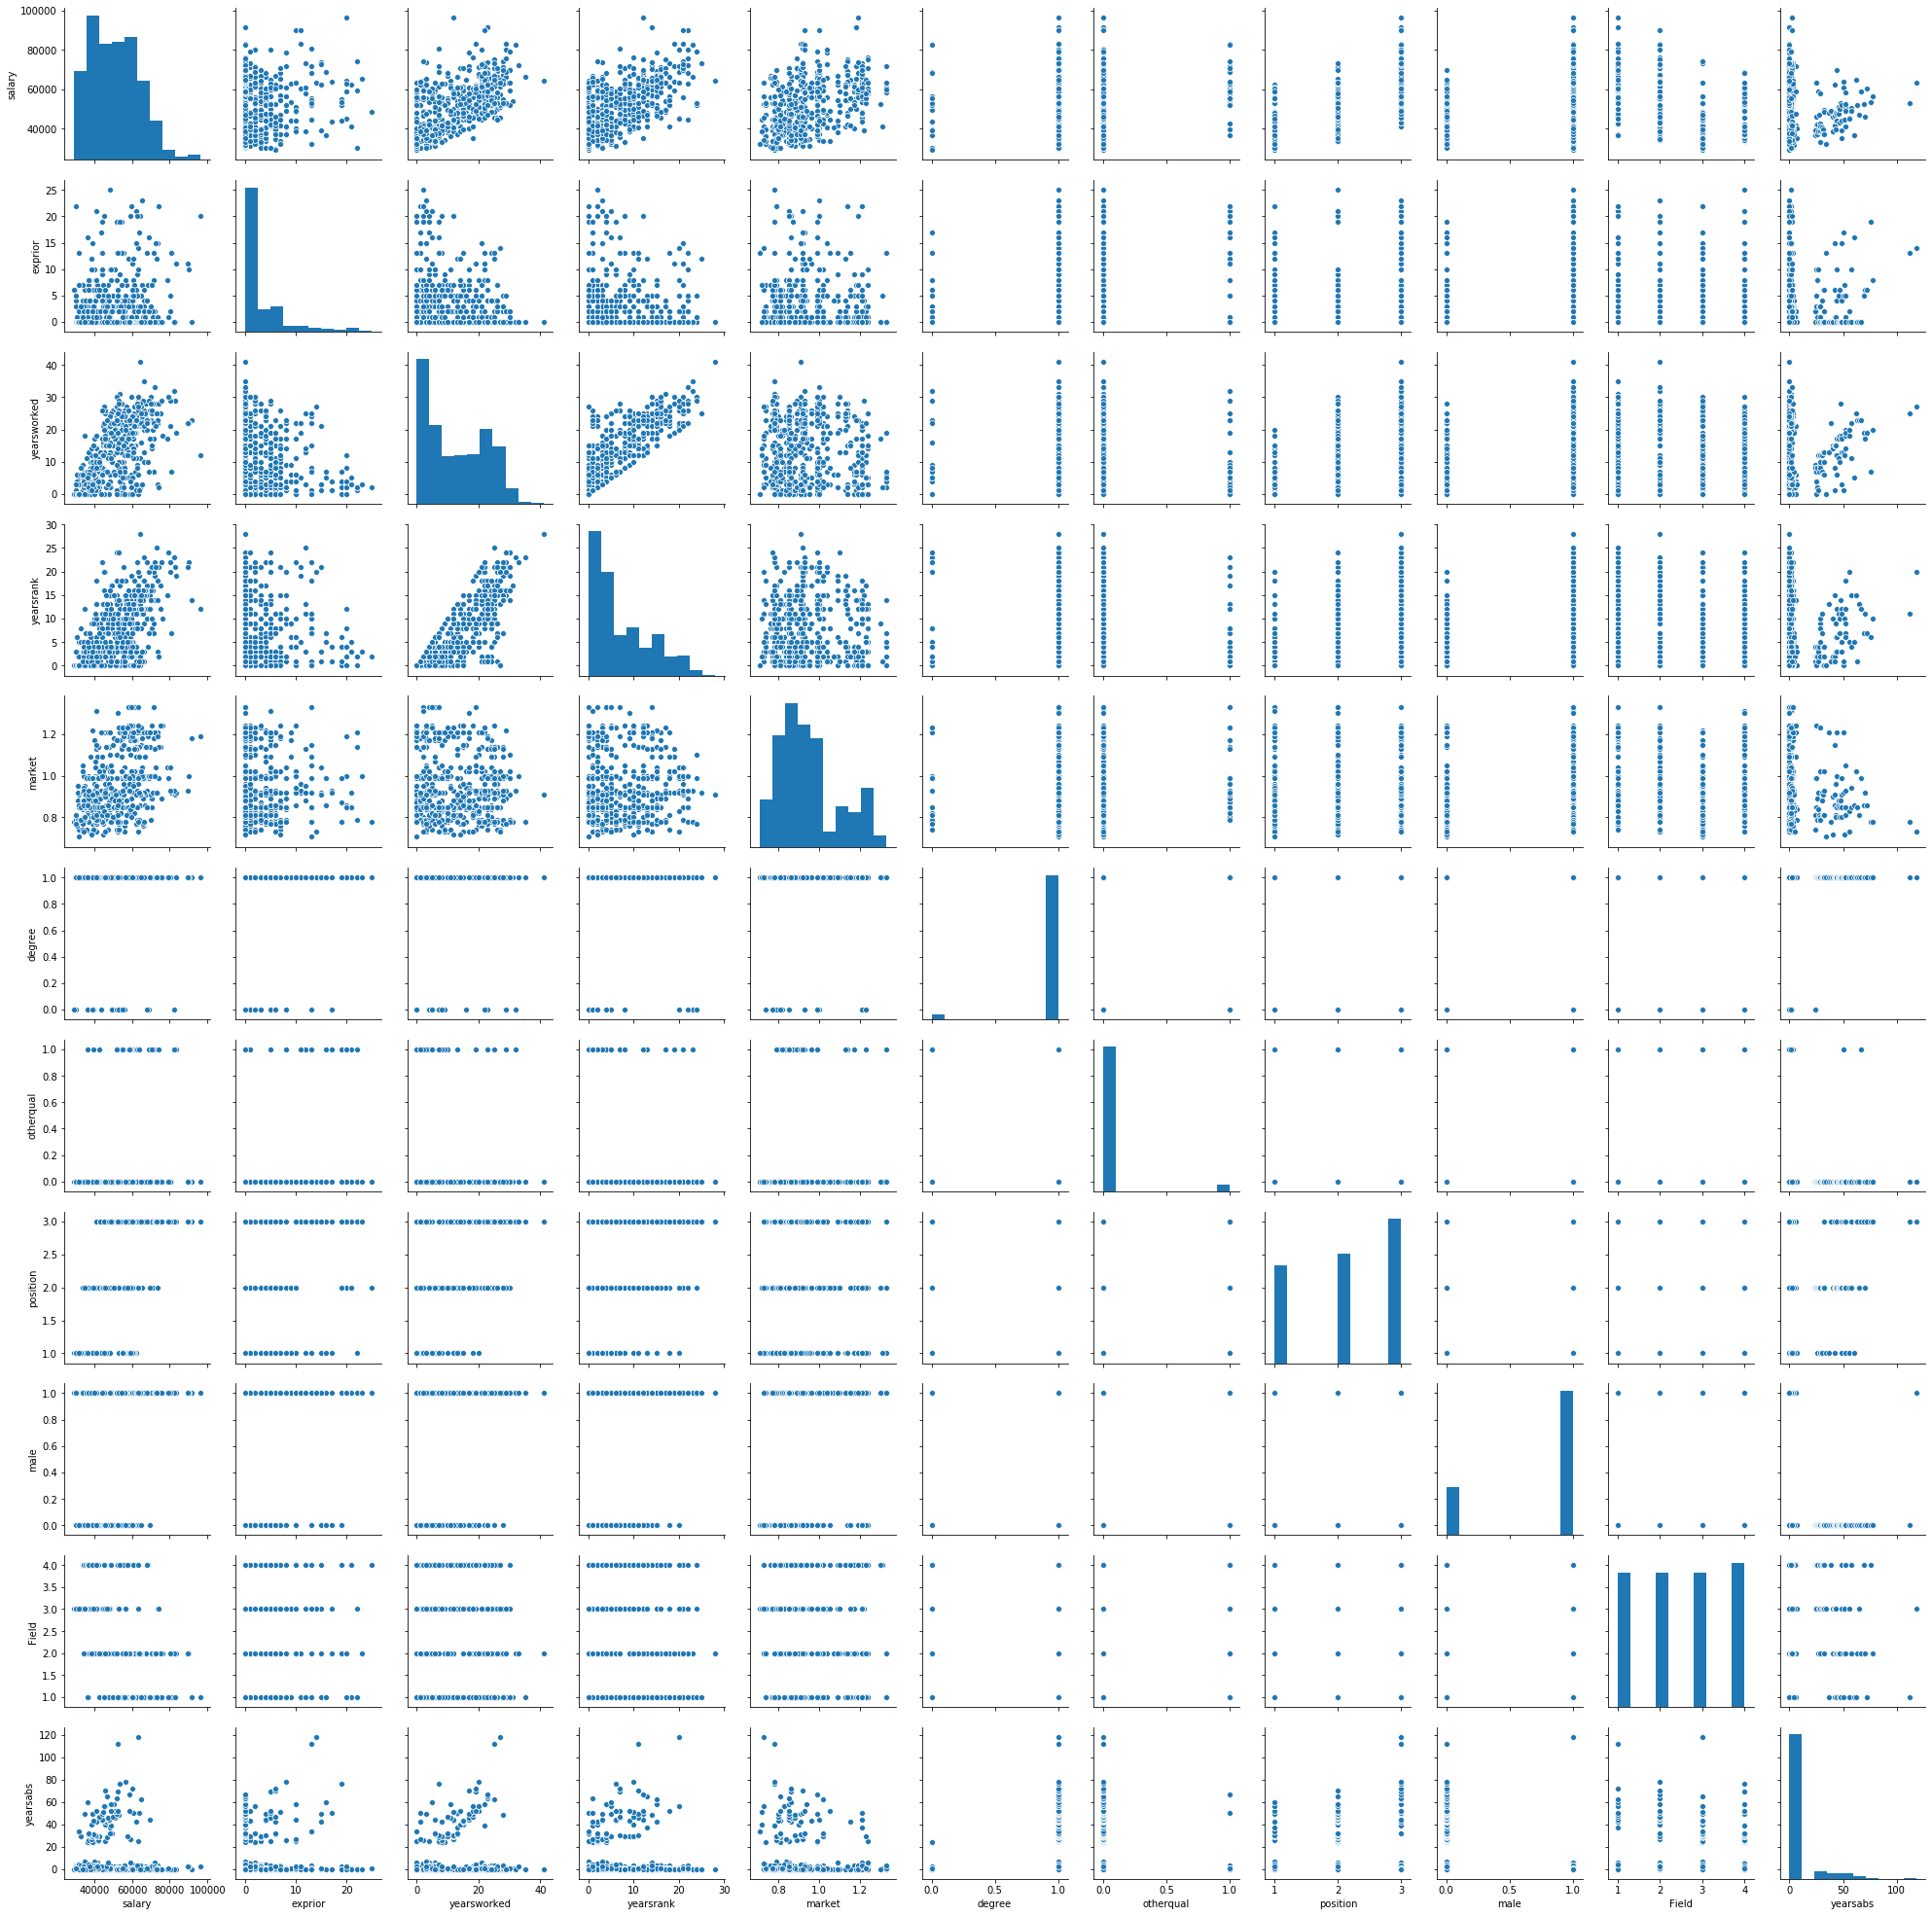

In [9]:
sns.pairplot(salary)

##### The null hypothesis states that there are no columns suitable to be used for modeling. There are no correlations between the target variable and other variables, the target variable being salary.

In [10]:
salary.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,-0.048315,0.132380
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.223827,-0.167068
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,-0.098424,0.029311
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.076623,-0.017639
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.128874,-0.622179
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


##### Upon inspection, we see that there is a correlation with three columns. The highest correlation is between salary and position. However, we cannot use the position for predicting because it is not a continuous value. Therefore we will use the yearsworked column because it has the second-highest correlation of 0.62 and it is a continuous value. This observation disproves the null hypothesis and causes us to accept the alternative hypothesis.


In [13]:
col = ['exprior','yearsworked','yearsrank','market','degree','otherqual','position','male','Field','yearsabs']

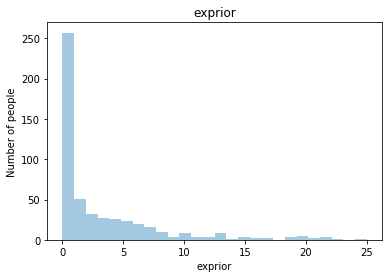

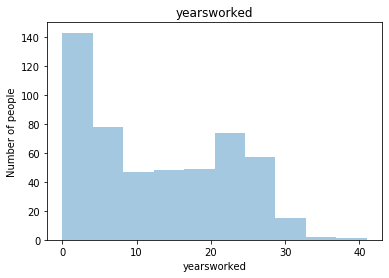

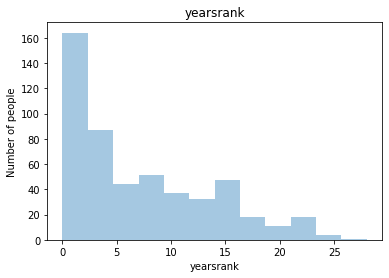

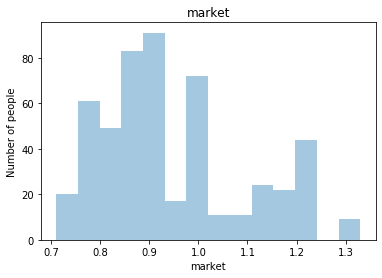

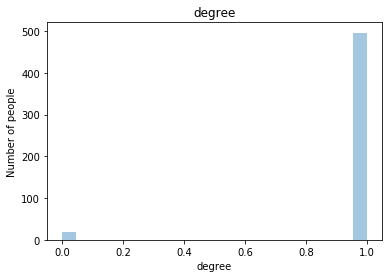

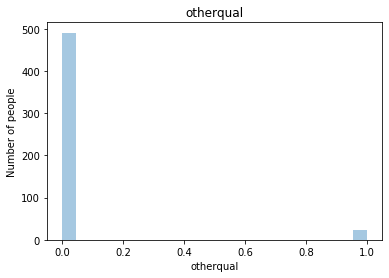

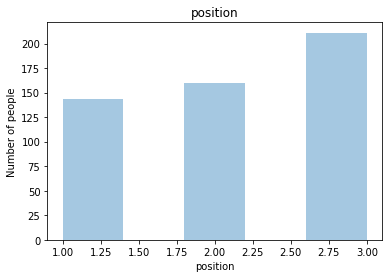

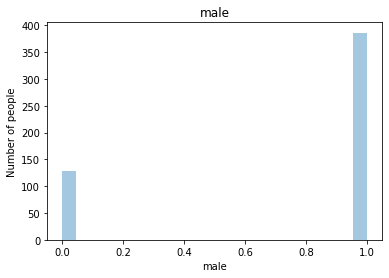

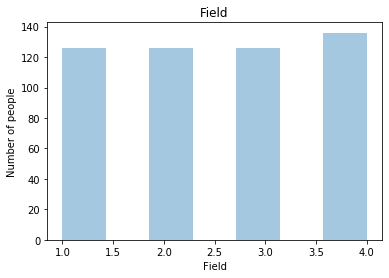

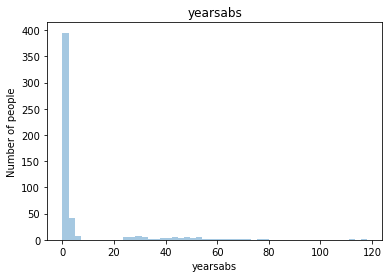

In [14]:
for i in col:
    sns.distplot(salary[i],kde=False)
    plt.title(f'{i}')
    plt.ylabel('Number of people')
    plt.show()

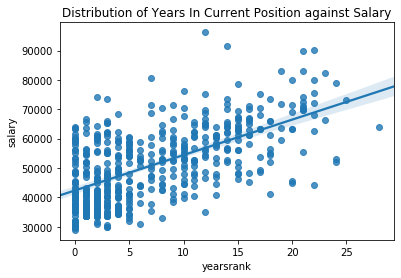

In [15]:
sns.regplot(salary['yearsrank'],salary['salary'])
plt.title('Distribution of Years In Current Position against Salary')
plt.show()

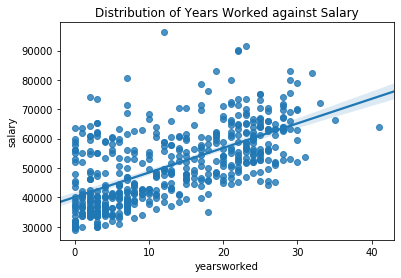

In [16]:
sns.regplot(salary['yearsworked'],salary['salary'])
plt.title('Distribution of Years Worked against Salary')
plt.show()

In [39]:
stats.pearsonr(salary['salary'], salary['Field'])

(-0.4984854745837175, 1.2205378378494786e-33)

##### One-hot encoding the variable Field into dummy variables using HR as reference. The purpose of this is so we can use Field to model. Discrete values cannot be modelled but by one-hot encoding them we can transform them into a usable form.

In [18]:
df_dummy = pd.get_dummies(salary,prefix_sep='_',columns=['Field'])                                                                                      

In [19]:
df_dummy

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_1,Field_2,Field_3,Field_4
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,45906.0,6,17,11,0.92,1,0,2,0,70,0,1,0,0
510,60402.0,6,19,7,0.86,1,0,3,0,72,1,0,0,0
511,53187.0,19,7,6,0.78,1,0,3,0,76,0,0,0,1
512,56542.0,8,20,10,0.78,1,0,3,0,78,0,1,0,0


In [20]:
df_dummy.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Field_1,Field_2,Field_3,Field_4
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.069622,0.425924,0.231553,-0.435677,-0.216296
exprior,0.119946,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,0.132380,0.054154,0.002187,-0.040330,-0.015614
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,0.055468,0.216959,0.150811,-0.268122,-0.097175
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,0.035632,0.197874,0.169645,-0.241797,-0.122602
market,0.407208,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.167068,0.198393,0.120506,-0.250137,-0.067055
degree,0.044552,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,0.029311,0.083956,0.034750,-0.063661,-0.053679
otherqual,0.167129,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.017639,0.029791,0.095418,-0.079586,-0.044491
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,0.029751,0.261283,0.139835,-0.307315,-0.091475
male,0.361447,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.622179,0.150364,0.024864,-0.163386,-0.011548
yearsabs,-0.069622,0.132380,0.055468,0.035632,-0.167068,0.029311,-0.017639,0.029751,-0.622179,1.000000,-0.023555,0.029569,0.011861,-0.017430


##### There is no multicollinearity in this set because our two predictors: 'yearsworked' and 'Field' are not correlated

##### Splitting the dataset into the train set and test set. 75% of the data will go into the training set and the remaining 25% will be used for testing.

In [59]:
x = df_dummy[['yearsworked','Field_3']]
y = salary['salary']
x = sm.add_constant(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=101)

model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.84e-54
Time:                        12:53:11   Log-Likelihood:                -4062.2
No. Observations:                 385   AIC:                             8130.
Df Residuals:                     382   BIC:                             8142.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.35e+04    907.121     47.954      0.000    4.17e+04    4.53e+04
yearsworked   731.0460     51.493     14.197      0.000     629.801     832.291
Field_3     -8726.7032   1148.404     -7.599      0.000    -1.1e+04   -6468.718
==============================================================================
Omnibus:                       51.082   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.410
Skew:                           0.912   Prob(JB):                     5.14e-16
Kurtosis:                       4.032   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####  The R squared value tells the quality of the regression model describing relationships between dependent and independent variables in a model. The R squared value for this model is 0.477 so the model is approximately 47.7% accurate. The p-value of this model is 0.000 so it is statistically significant.

##### The confidence interval is an estimate interval that might contain the value of the unstandardized coefficient. In this model, the coefficient is 735.15 for 'yearsworked'. This means that for every unit, there will be an increase of 731.04.

##### Predicting the salary using the train set

In [60]:
prediction = model.predict(x_train)

##### Creating a dataframe for the predicted values

In [61]:
df = pd.DataFrame(prediction)

In [62]:
df.rename(columns={0:'train_set_prediction'},inplace=True)

In [63]:
df

,train_set_prediction
323,61776.309601
43,45693.296608
36,43500.158473
510,57390.033330
351,64700.493782
...,...
461,39890.777540
393,44962.250563
495,57390.033330
75,38428.685450


##### Concatenating the two dataframes in order to compare the actual salaries and the predictions.

In [64]:
d = pd.concat([y_train,x_train,df],axis=1)

In [65]:
d

,salary,const,yearsworked,Field_3,train_set_prediction
323,61179.0,1.0,25,0,61776.309601
43,38600.0,1.0,3,0,45693.296608
36,48000.0,1.0,0,0,43500.158473
510,60402.0,1.0,19,0,57390.033330
351,66032.0,1.0,29,0,64700.493782
...,...,...,...,...,...
461,37615.0,1.0,7,1,39890.777540
393,35782.0,1.0,2,0,44962.250563
495,58530.0,1.0,19,0,57390.033330
75,41483.0,1.0,5,1,38428.685450


##### Based on the above, we can see that the predictions are not far off from the actual salaries. We can safely say that 'yearsworked' and 'Field' can somewhat predict how much an individual is going to earn.

In [66]:

residual = sm.regression.linear_model.RegressionResults.resid(model)

In [67]:
fitted_values = sm.regression.linear_model.RegressionResults.fittedvalues(model)

##### Plotting the residuals 

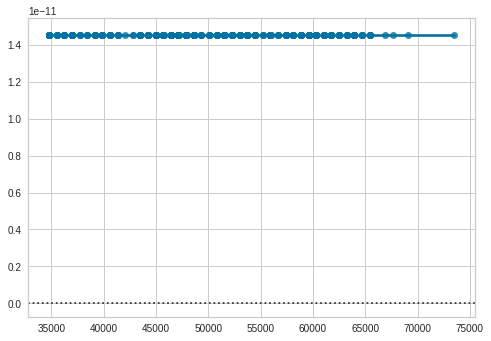

In [68]:
sns.residplot(fitted_values,prediction,lowess=True)

##### Predicting salary using the test set

In [69]:
test = model.predict(x_test)

##### Creating a dataframe of the predicted salaries from the test set

In [70]:
df_test = pd.DataFrame(test)
df_test.rename(columns={0:'test_prediction'},inplace=True)

In [71]:
df_test

,test_prediction
188,46470.191946
257,59583.171466
81,36966.593359
291,63969.447737
127,39159.731495
...,...
432,39890.777540
466,44277.053811
460,52272.711014
55,47886.434744


In [72]:
predictions = sm.OLS(y_test,x_test).fit()

In [73]:
predictions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     47.16
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           5.14e-16
Time:                        12:53:17   Log-Likelihood:                -1361.1
No. Observations:                 129   AIC:                             2728.
Df Residuals:                     126   BIC:                             2737.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.378e+04   1700.575     25.743      0.000    4.04e+04    4.71e+04
yearsworked   727.6464     94.683      7.685      0.000     540.272     915.021
Field_3     -7944.7634   1957.486     -4.059      0.000   -1.18e+04   -4070.956
==============================================================================
Omnibus:                       34.369   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.551
Skew:                           1.153   Prob(JB):                     3.54e-15
Kurtosis:                       5.657   Cond. No.                         44.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

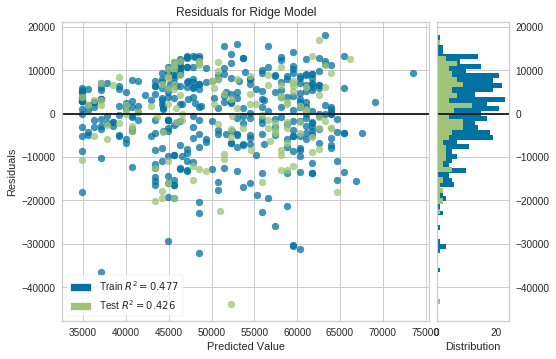

In [74]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

model1 = Ridge()
visualizer = ResidualsPlot(model1)

visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show() 

In [75]:
from sklearn import metrics
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train))))
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(x_test))))

TRAIN RMSE: 9248.788781034596
TEST RMSE: 9263.174041222725


##### The test RMSE is slightly bigger than the train RMSE. This shows that the model is slightly overfitted.